In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,ShuffleSplit,cross_val_score

In [2]:
shuju2= pd.read_excel("LIPIRIN_MET_identify.xlsx",index_col=0)

In [3]:
shuju2_ =shuju2.copy()

In [4]:
shuju2_

,D-Ribose 5-Phosphate,CLASS2
name,,
B46,1.500616e+08,1
B59,6.867684e+07,1
B60,5.250820e+07,1
B61,7.039699e+07,1
B62,1.007105e+08,1
B63,2.898887e+07,1
B64,2.171345e+07,1
B65,1.433695e+08,1
B67,2.652347e+07,1


In [5]:
FFS2 =shuju2_.drop(columns=['CLASS2'])

In [6]:
FFS2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, B46 to B97
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   D-Ribose 5-Phosphate  28 non-null     float64
dtypes: float64(1)
memory usage: 448.0+ bytes


In [7]:
target2 = shuju2_.CLASS2

In [8]:
transfer = StandardScaler()

In [9]:
tezheng2 = transfer.fit_transform(FFS2)

In [10]:
tezheng2

array([[ 0.35958697],
       [-0.64392727],
       [-0.84329471],
       [-0.62271694],
       [-0.24893633],
       [-1.13329971],
       [-1.22300936],
       [ 0.27707047],
       [-1.16369933],
       [-0.59028539],
       [-0.85316599],
       [-0.74693104],
       [-0.48555823],
       [-0.66017018],
       [-0.9154956 ],
       [ 1.15780964],
       [ 1.65682696],
       [ 0.41208507],
       [ 2.31720066],
       [-1.06945975],
       [ 0.47009792],
       [ 1.46737077],
       [ 0.66772571],
       [ 2.07663021],
       [-0.47031783],
       [-0.2173267 ],
       [ 0.16246095],
       [ 0.86272904]])

In [11]:
sss2 = ShuffleSplit(n_splits=100, test_size=0.2,random_state=99)

In [12]:
CCs = np.logspace(-3,3,1000)

In [13]:
acc_=[]
coeff_ = []
for C_ in CCs:
    LJ_2 = LogisticRegression(penalty='l2',C = C_, solver='liblinear', max_iter=10000)
    LJ_2.fit(tezheng2, target2)
    coeff_.append(LJ_2.coef_)
    score = cross_val_score(LJ_2, tezheng2, target2, cv=sss2)
    acc_.append(score.mean())

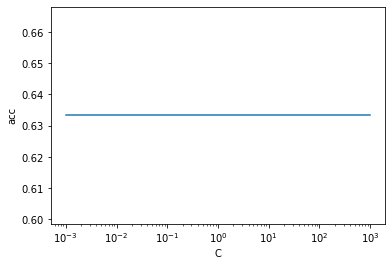

In [14]:
import matplotlib.pyplot as plt
plt.plot(CCs, acc_)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('acc')
plt.show()

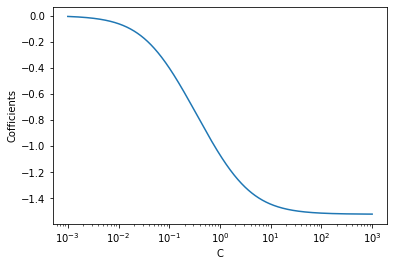

In [15]:
coeff_ = np.array(coeff_).reshape(1000,1)
plt.plot(CCs, coeff_)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Cofficients')
plt.show()

In [16]:
np.argmax(acc_)

0

In [17]:
CCs[0]

0.001

In [18]:
LJ2=LogisticRegression(penalty='l2',C =0.001, solver='liblinear').fit(tezheng2, target2)

In [19]:
 score2 = cross_val_score(LJ2, tezheng2, target2, cv=sss2)

In [20]:
 score2

array([0.66666667, 0.66666667, 0.66666667, 0.83333333, 0.33333333,
       0.5       , 0.5       , 1.        , 0.5       , 0.66666667])

In [21]:
LJ2.coef_

array([[-0.0066392]])

In [22]:
LJ2.score(tezheng2,target2)

0.6785714285714286

In [92]:
shuju23= pd.read_excel("IRIN-met-IDE-target-left.xlsx",index_col=0)

In [93]:
shuju23_ =shuju23.copy()

In [94]:
shuju23_

,L-TYROSINE,"3,4-Dihydroxy-L-phenylalanine",Deoxycholic acid,CLASS2
Sample Name,,,,
KX_Exp_1,524965098.4,2.970274e+05,1.326940e+06,NaN
KX_Exp_2,782244435.6,9.056174e+05,2.056896e+05,NaN
KX_Exp_3,758461805.0,9.762479e+05,2.370717e+05,NaN
KX_Exp_5,696973394.2,7.724102e+05,4.385878e+05,NaN
KX_Exp_6,645884153.1,8.546959e+05,3.214490e+05,NaN
KX_Exp_7,725669341.9,7.432774e+05,1.561901e+05,NaN
KX_Exp_8,774498915.9,1.252880e+06,1.443372e+05,NaN
KX_Exp_9,730325759.8,1.329349e+06,1.694410e+05,NaN
KX_Exp_10,338952488.5,5.576563e+05,3.939592e+05,NaN


In [95]:
FFS23 =shuju23_.drop(columns=['CLASS2'])

In [96]:
FFS23.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, KX_Exp_1 to CY_E_54
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   L-TYROSINE                     48 non-null     float64
 1   3,4-Dihydroxy-L-phenylalanine  48 non-null     float64
 2   Deoxycholic acid               48 non-null     float64
dtypes: float64(3)
memory usage: 1.5+ KB


In [97]:
target23 = shuju23_.CLASS2

In [98]:
transfer = StandardScaler()

In [99]:
tezheng23 = transfer.fit_transform(FFS23)

In [100]:
tezheng23

array([[-1.35899299, -1.19882922,  1.10166994],
       [ 0.7907762 , -0.1474831 , -0.18654531],
       [ 0.5920538 , -0.02546819, -0.15049013],
       [ 0.07827025, -0.37760011,  0.08103365],
       [-0.34862013, -0.2354505 , -0.05354816],
       [ 0.31804724, -0.42792737, -0.24341568],
       [ 0.72605635,  0.45241715, -0.2570336 ],
       [ 0.35695524,  0.58451804, -0.22819166],
       [-2.91327318, -0.74858986,  0.02975942],
       [ 0.56806051,  0.27135455, -0.33794779],
       [ 1.40263148, -0.09466199, -0.34435184],
       [ 0.49919375, -0.15877082, -0.2145739 ],
       [ 0.44623619,  0.03053257, -0.38761866],
       [ 0.08312059, -0.14492023, -0.39001924],
       [ 0.16874967,  0.89135693, -0.40764255],
       [ 1.05204546, -0.70711967, -0.34515736],
       [-0.49663246,  0.67317508, -0.39081772],
       [ 0.53237995,  0.6800609 , -0.4020362 ],
       [ 1.04457859, -0.60142578, -0.36838511],
       [ 0.34479312,  0.26880849, -0.41244835],
       [ 0.91137963, -0.39649058, -0.390

In [102]:
test_predict = LJ2.predict(tezheng23)
test_predict

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0], dtype=int64)